In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

Using backend: tensorflow.compat.v1

2023-05-04 20:29:13.335734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


2023-05-04 20:29:54.836603: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 20:29:57.271339: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 20:29:57.272452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Enable just-in-time compilation with XLA.




In [2]:
L = 1
m = 1
omega = 0.5

In [3]:
nx = 2
ny = 1

In [4]:
def psi(x, n):
    constants = (1.0 / (np.sqrt(np.math.factorial(n) * 2 ** n))) * (((m * omega) / np.pi) ** 0.25)
    exponent = np.exp(-0.5 * m * omega * np.power(x, 2))
    hermite_coefficients = [0] * n + [1]
    hermite = np.polynomial.hermite.Hermite(hermite_coefficients)
    hermite_value = hermite(x * np.sqrt(m * omega))
    result = constants * exponent * hermite_value
    return result.astype(dde.config.real(np))

In [5]:
def psi_2d_rectangle(x):
    x_component = psi(x[:, 0:1], nx)
    y_component = psi(x[:, 1:2], ny)
    return x_component * y_component

In [6]:
domain = dde.geometry.Rectangle([-L, -L], [L, L])

In [7]:
num_train = 16 ** 2
num_test = 100 ** 2
data = dde.data.Function(domain, psi_2d_rectangle, num_train, num_test)#, train_distribution='pseudo')

In [8]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([2] + [20] * 5 + [1], activation, initializer)

In [9]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
Building feed-forward neural network...
'build' took 0.218332 s



/home/piotr/repos/quant-chem-pinns/venv/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-05-04 20:35:24.452535: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 20:35:24.452865: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 20:35:24.453114: I tensorflow/compiler/x

'compile' took 8.988412 s



In [10]:
loss_history, train_state = model.train(iterations=20000)

Initializing variables...


2023-05-04 20:36:52.637063: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Training model...



2023-05-04 20:36:55.034718: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f86300056b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-04 20:36:55.034813: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2023-05-04 20:36:55.759658: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-04 20:37:10.446743: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-05-04 20:37:23.383673: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss    Test loss     Test metric   
0         [8.91e-02]    [8.29e-02]    [2.89e+00]    
1000      [1.78e-05]    [1.56e-05]    [3.96e-02]    
2000      [1.46e-05]    [1.44e-05]    [3.81e-02]    
3000      [1.90e-06]    [1.96e-06]    [1.41e-02]    
4000      [4.52e-07]    [4.39e-07]    [6.65e-03]    
5000      [3.29e-07]    [3.10e-07]    [5.59e-03]    
6000      [2.55e-06]    [2.35e-06]    [1.54e-02]    
7000      [1.70e-05]    [1.64e-05]    [4.06e-02]    
8000      [2.49e-06]    [2.36e-06]    [1.54e-02]    
9000      [1.03e-05]    [9.31e-06]    [3.06e-02]    
10000     [9.14e-07]    [7.46e-07]    [8.67e-03]    
11000     [4.36e-07]    [3.93e-07]    [6.29e-03]    
12000     [1.06e-05]    [9.48e-06]    [3.09e-02]    
13000     [9.10e-07]    [8.73e-07]    [9.38e-03]    
14000     [1.17e-07]    [1.04e-07]    [3.23e-03]    
15000     [2.79e-07]    [2.73e-07]    [5.24e-03]    
16000     [8.64e-07]    [8.56e-07]    [9.29e-03]    
17000     [5.80e-07]    [5.12e-07]    [7.18e-0

Saving loss history to /home/piotr/repos/quant-chem-pinns/harmonic-oscillator/2d/loss.dat ...
Saving training data to /home/piotr/repos/quant-chem-pinns/harmonic-oscillator/2d/train.dat ...
Saving test data to /home/piotr/repos/quant-chem-pinns/harmonic-oscillator/2d/test.dat ...


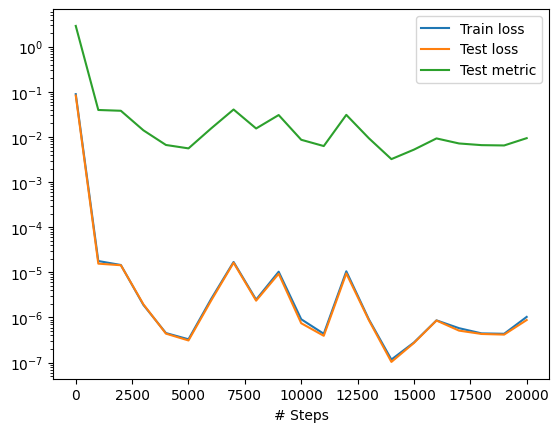

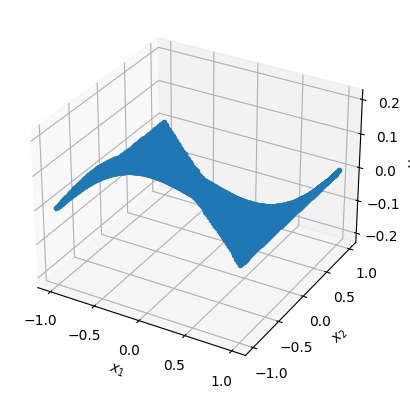

In [11]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True)

In [12]:
def diff_function(x):
    model_value = model.predict(x)
    true_value = psi_2d_rectangle(x)
    return model_value - true_value

In [13]:
diff_function(np.array([[0.0, 0.0], [1.0, 0.0]]))

array([[-0.00015502],
       [-0.00102943]], dtype=float32)

In [17]:
def plot_2d_map(plotted_function, grid_dist=0.01):
    x_ax = np.arange(-L, L, grid_dist)
    y_ax = np.arange(-L, L, grid_dist)
    grid_x, grid_y = np.meshgrid(x_ax, y_ax)
    
    diff_list = []
    for a, b in zip(grid_x, grid_y):
        pair_list = []
        for x, y in zip(a, b):
            pair_list.append([x, y])
        pairs = np.array(pair_list)
        diff_list.append(np.squeeze(plotted_function(pairs)))

    diff_list = np.array(diff_list)
    
    im = plt.imshow(diff_list, cmap=plt.cm.RdBu)
    plt.colorbar(im)

    plt.show()

In [14]:
x_ax = np.arange(-L, L, 0.01)
y_ax = np.arange(-L, L, 0.01)
grid_x, grid_y = np.meshgrid(x_ax, y_ax)

In [15]:
diff_list = []
for a, b in zip(grid_x, grid_y):
    pair_list = []
    for x, y in zip(a, b):
        pair_list.append([x, y])
    pairs = np.array(pair_list)
    diff_list.append(np.squeeze(diff_function(pairs)))

diff_list = np.array(diff_list)
print(diff_list.shape)

(200, 200)


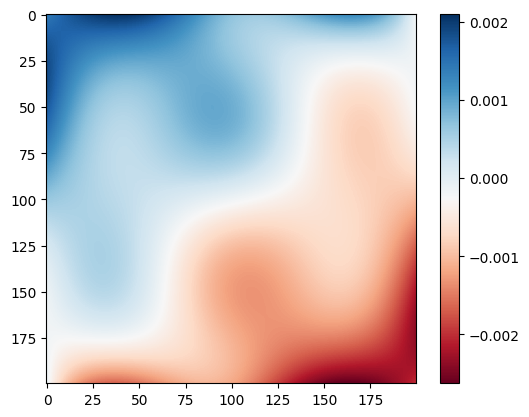

In [16]:
im = plt.imshow(diff_list, cmap=plt.cm.RdBu)
plt.colorbar(im)

plt.show()

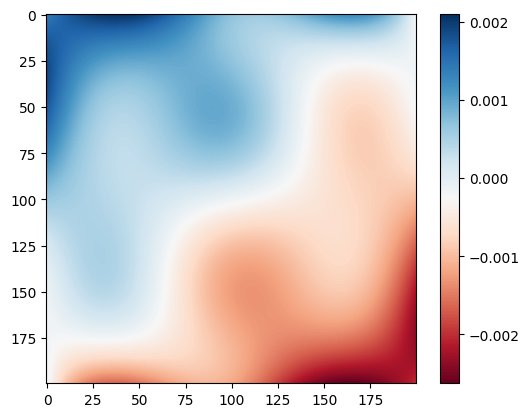

In [18]:
plot_2d_map(diff_function)

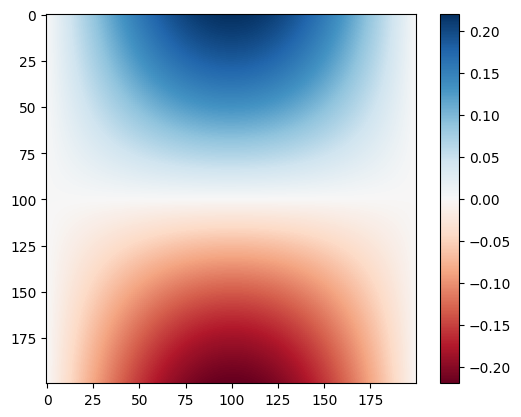

In [19]:
plot_2d_map(model.predict)

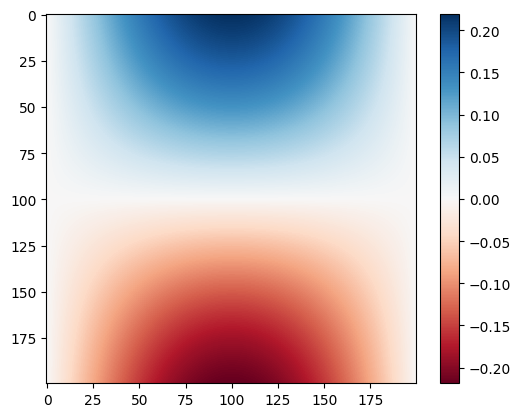

In [20]:
plot_2d_map(psi_2d_rectangle)